In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv("iris-data.csv") 

In [3]:
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


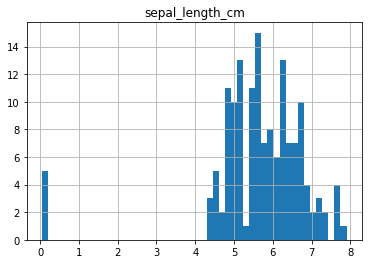

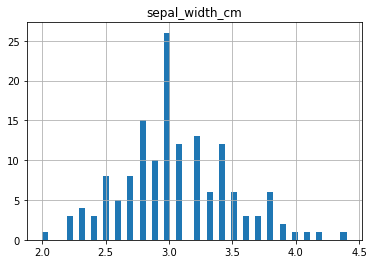

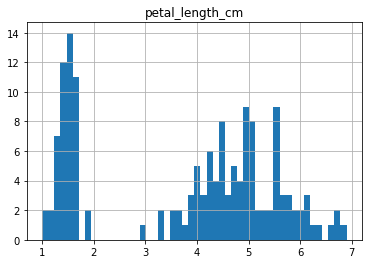

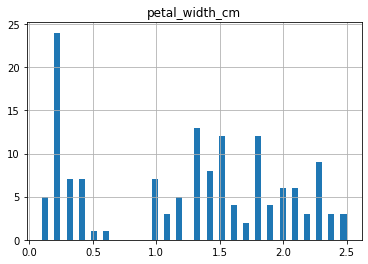

In [5]:
# TO plot a hist of all the columns and see the distribution and if they have outlier

columns = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm','petal_width_cm']

for i in columns:
    iris.hist(i, bins=50)

In [6]:
# To check the data types and see if there are any Nan values

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
# To assign the nan values into a dataframe and be able to have a look at them

nan_values = iris[pd.isnull(iris).any(axis=1)]

In [8]:
nan_values

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [9]:
# For the describe function and the histogram notices that there were some outliers in this column
# We can clearly see from the distribution that these values are typos from the original values (4 to 8)

iris.loc[iris['sepal_length_cm'] < 4]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


In [10]:
# Multiplying the miss typed values by 100 to correct their values

iris['sepal_length_cm'] = iris['sepal_length_cm'].apply(lambda x: (x*100) if x < 4 else x)

In [11]:
# making sure that the above step worked

iris.loc[iris['sepal_length_cm'] < 4]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [12]:
#To check the unique values in the class column
iris['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [13]:
# To replace the typos in the class names with the correct ones
iris.replace({'class': {'Iris-setossa':'Iris-setosa', 'versicolor':'Iris-versicolor'}}, inplace = True)

In [14]:
# To view the count again and make sure that the values are replaced
iris['class'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: class, dtype: int64

In [15]:
#To interplotae the Nan values

iris_fixed = iris.interpolate(inplace = False)

In [16]:
iris_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     150 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [17]:
# To round the interpolated values to the second decimal
iris_fixed.petal_width_cm = iris_fixed.petal_width_cm.round(2)

In [18]:
#To make sure that the Nans are interpolated
iris_fixed.iloc[7:12, :]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.27,Iris-setosa
8,4.4,2.9,1.4,0.23,Iris-setosa
9,4.9,3.1,1.5,0.20,Iris-setosa
10,5.4,3.7,1.5,0.17,Iris-setosa
11,4.8,3.4,1.6,0.13,Iris-setosa


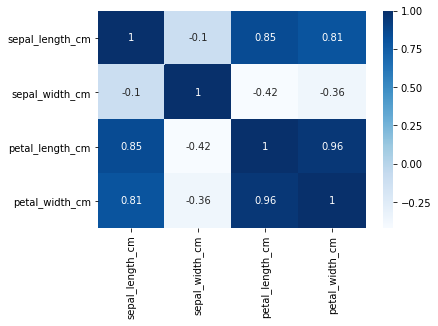

In [19]:
corr_matrix = iris_fixed.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

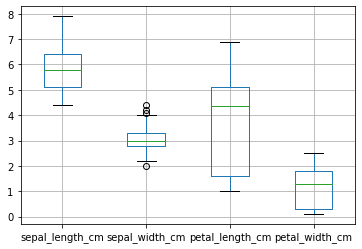

In [20]:
# To check if there are any outliers

iris_fixed.boxplot()

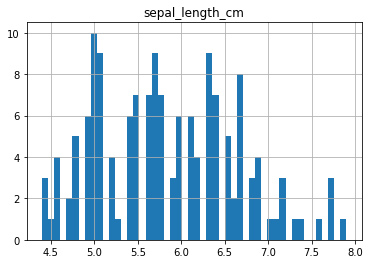

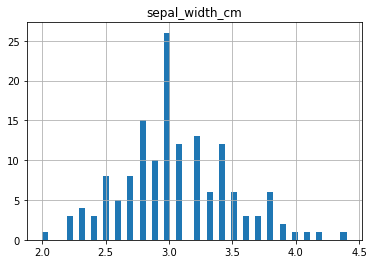

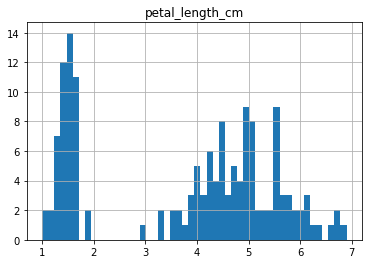

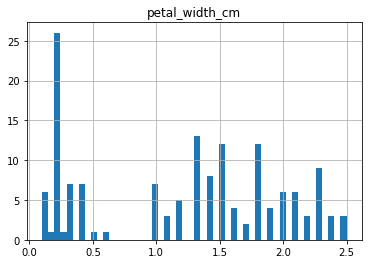

In [25]:
columns = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm','petal_width_cm']

for i in columns:
    iris_fixed.hist(i, bins=50)

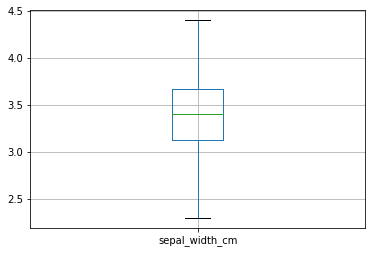

In [21]:
iris_fixed[iris_fixed['class'] == 'Iris-setosa'].boxplot('sepal_width_cm')

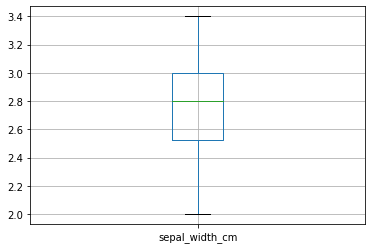

In [22]:
iris_fixed[iris_fixed['class'] == 'Iris-versicolor'].boxplot('sepal_width_cm')

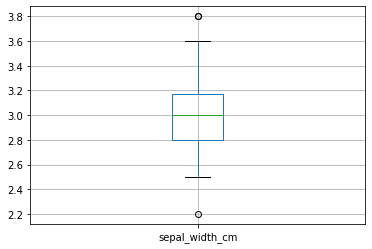

In [23]:
iris_fixed[iris_fixed['class'] == 'Iris-virginica'].boxplot('sepal_width_cm')

In [24]:
# TO save the cleaned dataset to a csv file

iris_fixed.to_csv("iris-data_cleaned.csv", index=False)